Step 1: Set state number


In [1]:
my_state_number = 673

Step 2: Read the data_set.csv

In [2]:
import pandas as pd
data = pd.read_csv("data_set.csv")

data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Step 3: Sample the data randomly the data and save the dataframe as myNewData 

In [3]:
myNewData = data.sample(frac =.90, replace = False, random_state = my_state_number)
myNewData.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
413,46,96,2.0869,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1719,60,468,7.8000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1615,83,110,1.3253,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1643,24,120,5.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
530,60,88,1.4666,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Start the Analytics using **myNewData** dataframe as the raw data
note: your *myNewData* dataframe may be different from other students' *myNewData* dataframe

In [4]:
myNewData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587 entries, 413 to 291
Columns: 1559 entries, feature_1 to Class
dtypes: float64(1), int64(1558)
memory usage: 18.9 MB


# Import Dependencies

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [6]:
# Filter warnings

warnings.filterwarnings('ignore')

# Data Understanding

To understand more about the dataset.

## Dataset Details

### Data Shape

In [7]:
myNewData.shape

(1587, 1559)

The data has 1587 rows of data and 1559 columns.

### Data Information

In [8]:
myNewData.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1587 entries, 413 to 291
Data columns (total 1559 columns):
 #     Column        Dtype  
---    ------        -----  
 0     feature_1     int64  
 1     feature_2     int64  
 2     feature_3     float64
 3     feature_4     int64  
 4     feature_5     int64  
 5     feature_6     int64  
 6     feature_7     int64  
 7     feature_8     int64  
 8     feature_9     int64  
 9     feature_10    int64  
 10    feature_11    int64  
 11    feature_12    int64  
 12    feature_13    int64  
 13    feature_14    int64  
 14    feature_15    int64  
 15    feature_16    int64  
 16    feature_17    int64  
 17    feature_18    int64  
 18    feature_19    int64  
 19    feature_20    int64  
 20    feature_21    int64  
 21    feature_22    int64  
 22    feature_23    int64  
 23    feature_24    int64  
 24    feature_25    int64  
 25    feature_26    int64  
 26    feature_27    int64  
 27    feature_28    int64  
 28    feature_29   

A quick scan of the above columns show that all columns are of the `int64` and `float64` type. This suggests that no data encoding is required. Column names from 0 - 1557 follow a specific format `feature_num`, indicating that these are the features that will be used for prediction of defective products. The column `Class` is the target variable. According to the dataset description given in the question, 0 = normal and 1 = defective.

### Nature of Data

In [9]:
myNewData.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
413,46,96,2.0869,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1719,60,468,7.8000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1615,83,110,1.3253,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1643,24,120,5.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
530,60,88,1.4666,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
myNewData.tail()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
832,75,67,0.8933,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1685,152,200,1.3157,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
333,48,48,1.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1365,23,127,5.5217,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
291,40,120,3.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The first and last five rows of data are shown above. It can be observed that `feature_1` and `feature_2` have values that are more than 1, whereas `feature_3` has float values. The remaining features, including `Class`, are just binary values (of `int64` type).

In [11]:
myNewData.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
count,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,...,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000,1587.000000
mean,52.973535,126.936988,3.452745,0.724008,0.003151,0.003151,0.008822,0.002520,0.005041,0.011342,...,0.004411,0.006301,0.003151,0.003151,0.004411,0.015753,0.015753,0.010712,0.001260,0.081916
std,55.732070,130.809151,4.737183,0.447154,0.056059,0.056059,0.093538,0.050157,0.070843,0.105927,...,0.066288,0.079155,0.056059,0.056059,0.066288,0.124558,0.124558,0.102976,0.035489,0.274322
min,1.000000,1.000000,0.001500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,32.000000,1.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,96.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,160.000000,4.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,640.000000,640.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the description above, it can be known that the range of `feature_1` and `feature_2` is 1 to 640. The range of `feature_3` is 0.0015 to 60. It can be known that `feature_1` and `feature_2` are numerical variables, whereas the rest are just binary categorical variables. The data values fall into a relatively large overall range between 0 to 640, which suggests the need for data scaling to improve model accuracy.

In [12]:
# Set numerical variables
num_data = (myNewData[['feature_1', 'feature_2', 'feature_3']]).columns.values

# Set categorical variables
cat_data = (myNewData.drop(columns=num_data)).columns.values

## Data Exploration

### Data Distribution

Exploring the dataset's general distribution pattern. Only `feature_1`, `feature_2`, `feature_3` and `class` will be analysed for efficiency as the remaning features are mostly binary.

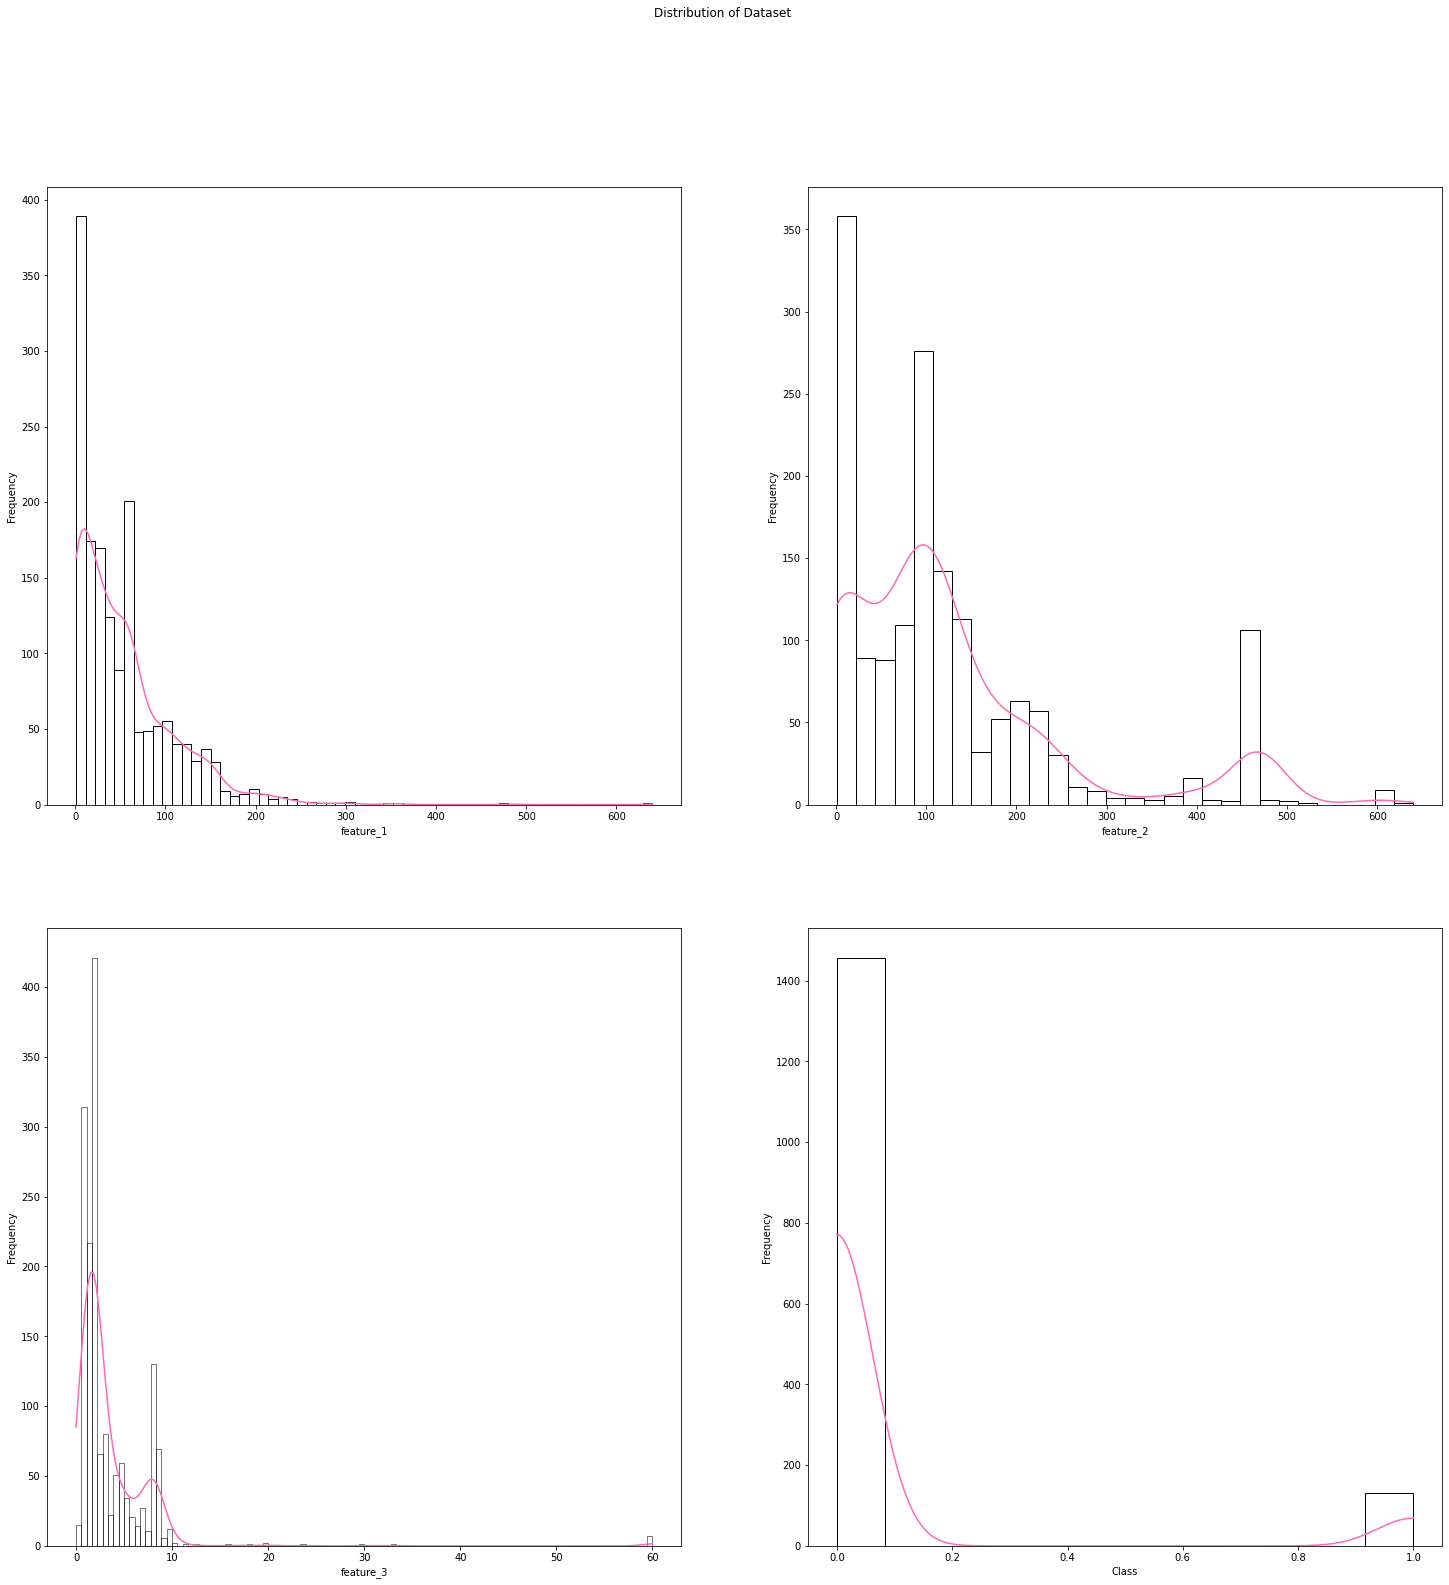

In [13]:
# Define columns
cols = num_data
cols = np.append(cols, 'Class')

# Set subplots
fig, ax = plt.subplots(2, 2, figsize=(25,25))
fig.suptitle('Distribution of Dataset')

# Flatten ax from 2D to 1D array
ax = ax.flatten()

for i in range(len(cols)):
    sns.histplot(data=myNewData, ax=ax[i], x=cols[i], kde=True, color='hotpink', alpha=0)
    ax[i].set(xlabel=cols[i], ylabel='Frequency')


As shown from the graphs above, `feature_1` and `feature_3` are skewed to the right. `feature_2` is also rather right-skewed but its distribution is wider than `feature_1`, where both features shares the same data range. In the `CLass` variable, it can be seen that there are approximately 1/15 of products are defective.

### Numerical Data Analysis

Analysing the relationship between numerical columns adn the target variable `Class`.

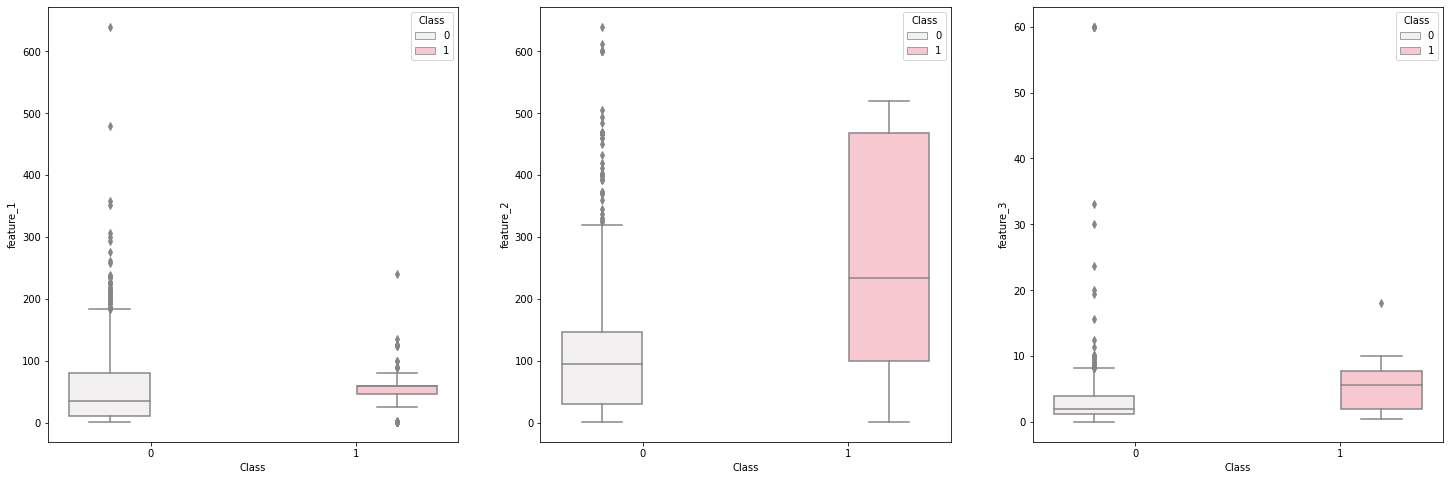

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(25,8))

ax = ax.flatten()

for i, v in enumerate(num_data):
    sns.boxplot(data=myNewData, ax=ax[i], x='Class', y=v, hue='Class', color='pink')
    ax[i].set(xlabel='Class', ylabel=v)

From the graphs above, it seems that products with a higher `feature_2` from approximately 150 to 500 are generally defective. Products with a `feature_3` of around 5 to 10 would have a higher defective rate. `feature_1` seems not to have a significant effect on the defective rate, as products that fall in the range between 0 and 100 are mostly normal. Outliers are present for all graphs.

## Feature Selection

Before further exploration can be done, this dataset needs to be downsized as there are over 1500 features in total and would be infeasible to look into all of them. Only features with correlation of more than or equals to 0.3 will be considered.

In [ ]:
cor = myNewData.corr()

In [58]:
# Get the correlation of the target variable
cor_target = abs(cor['Class'])

# Select highly correlated features
relevant_features = cor_target[cor_target >= 0.3]
relevant_features

feature_2       0.324734
feature_352     0.344006
feature_969     0.376516
feature_1048    0.392081
feature_1090    0.330640
feature_1109    0.367049
feature_1119    0.367049
feature_1144    0.390659
feature_1154    0.398577
feature_1155    0.383854
feature_1199    0.383854
feature_1208    0.310726
feature_1219    0.383854
feature_1244    0.415223
feature_1345    0.386530
feature_1374    0.330640
feature_1395    0.362483
feature_1400    0.449280
feature_1423    0.383854
feature_1425    0.383854
feature_1436    0.304025
feature_1456    0.317024
feature_1484    0.306689
Class           1.000000
Name: Class, dtype: float64

The variables above are somewhat correlated to the target variable. However, due to the problem of multicollinearity, these variables should be independent and uncorrelated with each other. Variables with a similar correlation with other variables are basically redundant and will be dropped.

In [59]:
myNewData2 = relevant_features.to_frame()
myNewData2 = myNewData2.T

In [60]:
relevant_features = myNewData2.columns.values

<AxesSubplot:title={'center':'Heatmap for Correlation Matrix on Relevant Features'}>

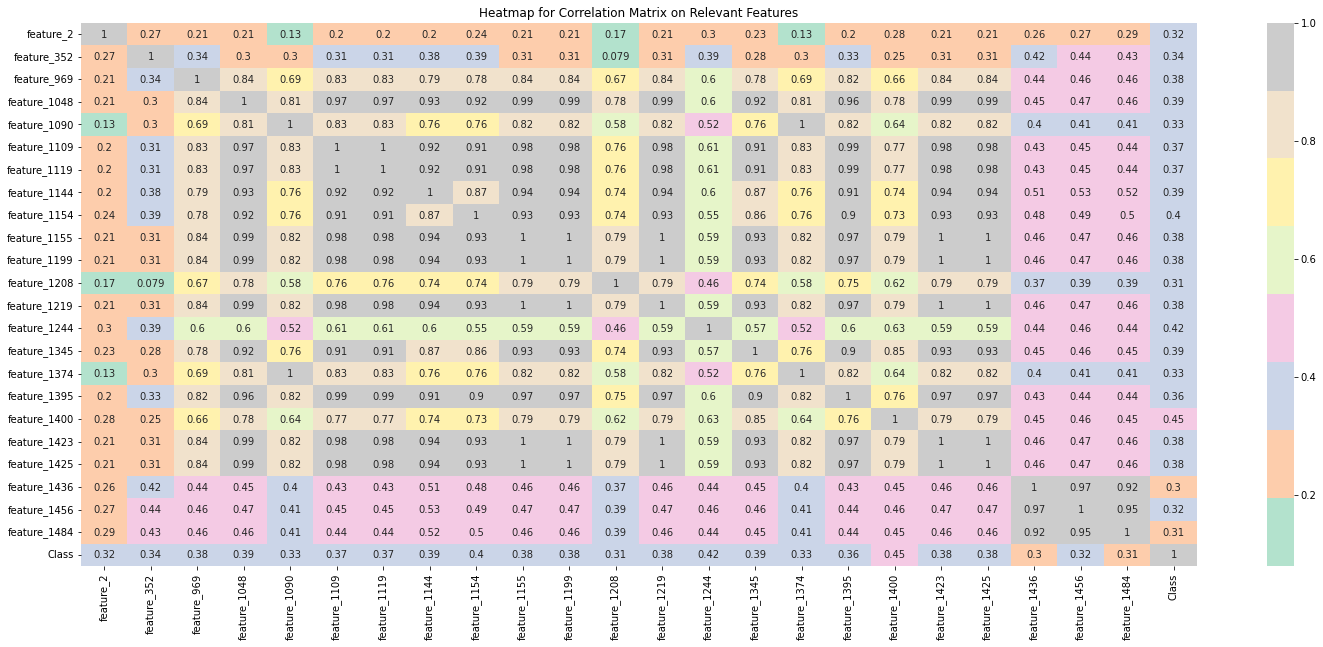

In [61]:
cor2 = myNewData[relevant_features].corr()

plt.figure(figsize=(25, 10))
plt.title('Heatmap for Correlation Matrix on Relevant Features')
sns.heatmap(cor2, cmap='Pastel2', annot=True)

From the graph above, some highly correlated variables include `feature_1109` to `feature_1199`, `feature_1219`, `feature_1395`, `feature_1423`, `feature_1425`,  as they have similar correlations to other variables. Therefore, only one of them will be used.

In [113]:
myNewData3 = myNewData[['feature_2', 'feature_352', 'feature_969', 'feature_1048', 'feature_1090', 'feature_1154', 'feature_1208', 'feature_1244', 'feature_1345', 'feature_1400', 'feature_1456', 'Class']]
relevant_features = myNewData3.columns.values

### Categorical Data Analysis

There is now a total of 11 features only, 10 of which are categorical, 1 is numerical.

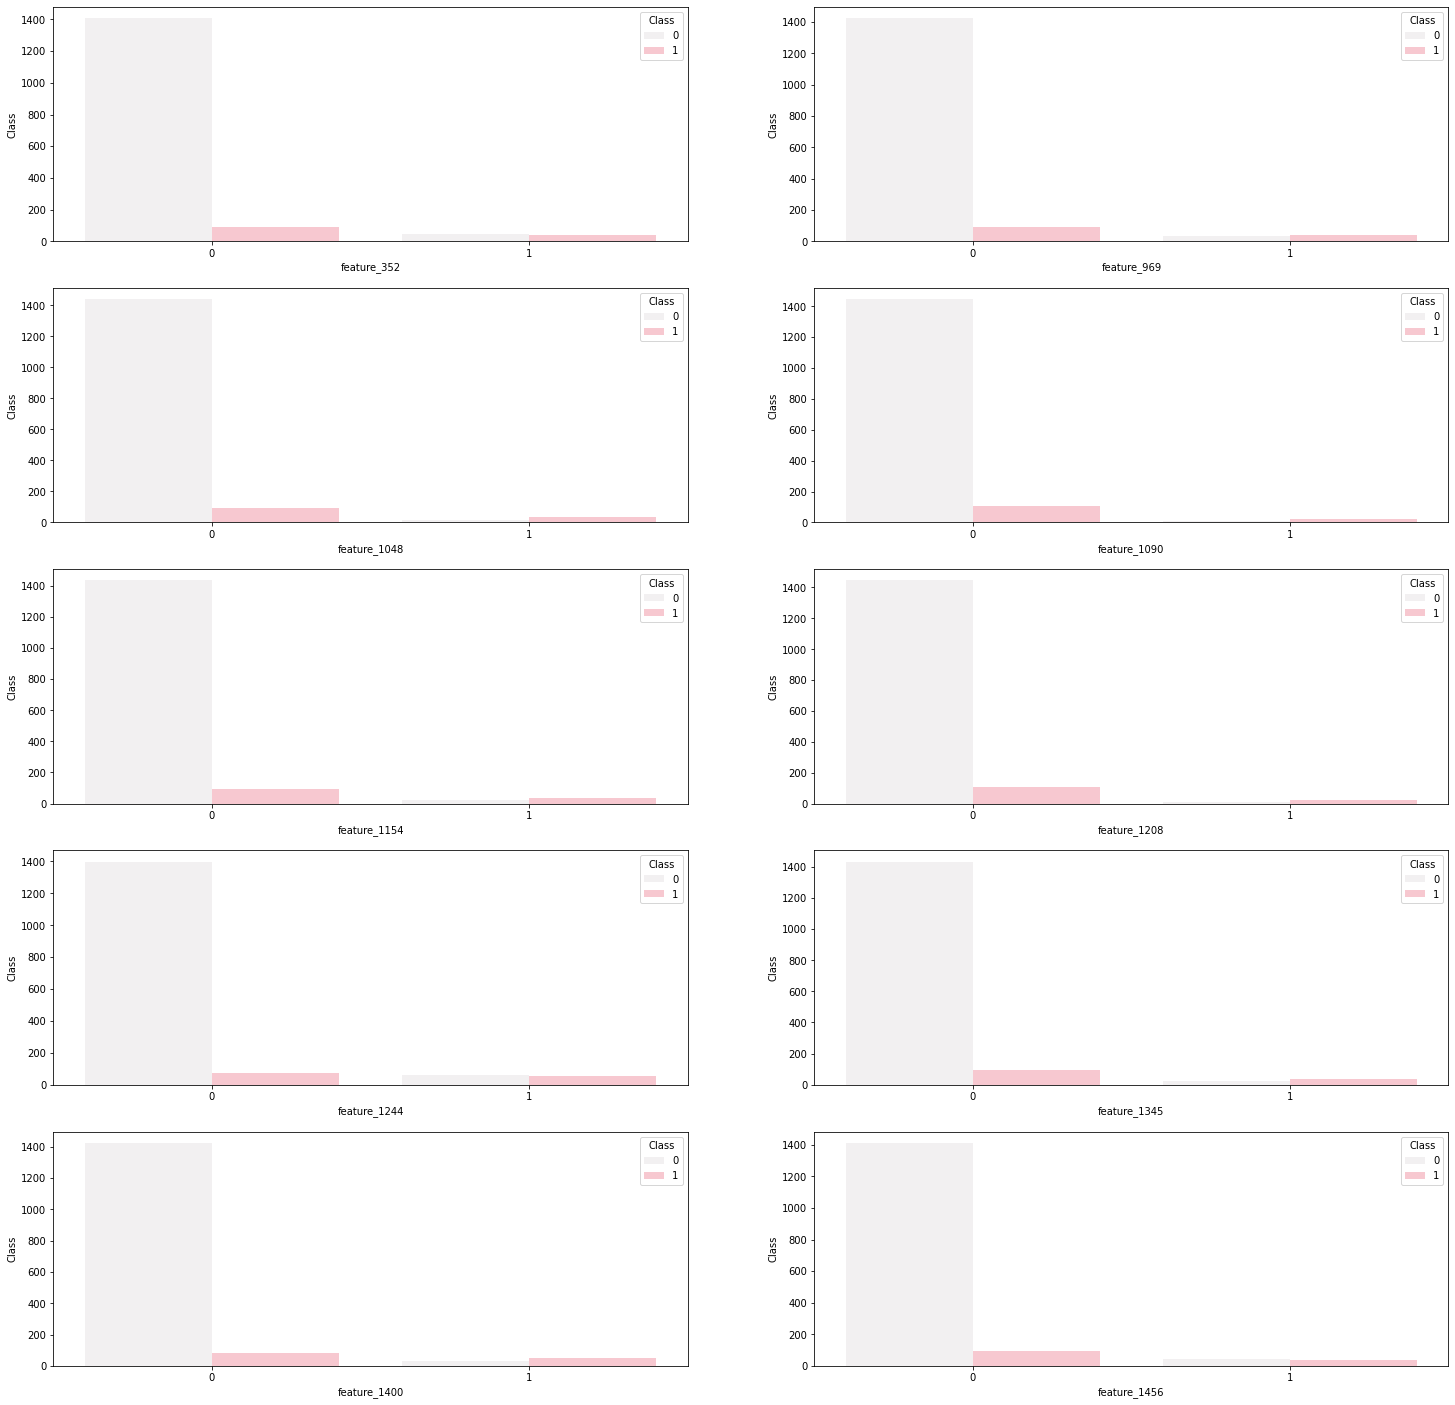

In [114]:
fig, ax = plt.subplots(5, 2, figsize=(25,25))

ax = ax.flatten()

for i, v in enumerate(relevant_features[1:]):
    if(v == 'Class'):
        continue
    sns.countplot(data=myNewData3, ax=ax[i], x=v, hue='Class', color='pink', alpha=1)
    ax[i].set(xlabel=v, ylabel='Class')

Since `feature_2` is a numerical variable that has been checked previously, it will not be checked here. From the graphs above, it seems like when all these feature are not present, the the product is more likely to be defective. When these features are present, the product is likely to be a normal.

# Data Preprocessing

## Null Value Check

In [115]:
myNewData3.isnull().sum()

feature_2       0
feature_352     0
feature_969     0
feature_1048    0
feature_1090    0
feature_1154    0
feature_1208    0
feature_1244    0
feature_1345    0
feature_1400    0
feature_1456    0
Class           0
dtype: int64

There are no null values. Hence, no further processing is required.

In [116]:
df = myNewData3

## Data Splitting

Splitting features and target label. The dataset has been randomised earlier on. Training and test sets follow a 70:30 ratio.

In [117]:
X_df = df.drop('Class', axis=1)
y_df = df['Class']

# Split ratio
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3)

## Data Scaling

Only `feature_2` is out of range as a numerical variable, where all other features are between the range of 0 and 1. Therefore, data scaling is required. Normalisation will be used with the `MinMaxScaler` since this scaler keeps all values between 0 and 1.

In [118]:
# Define scaler
scaler = MinMaxScaler()

# Fit and transform
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.73082942, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15492958, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22691706, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29890454, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02190923, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.35837246, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

Only the values of the `feature_2` will be really affected. Now the values in `feature_2` are between 0 and 1.

# Model Selection

First of all, this is a classification problem as the goal is to predict whether the product into a normal class or a defective class, which means the model is required to classify the applicant into `Class` of value 0 (normal) or 1 (defective).
<br />
<br />
Therefore, the models that will be trained and evaluated for comparison are k neighbour classifier, decision tree classififer and random forest classfier.

In [119]:
def predict(model, X_train, X_test, y_train, y_test):
    # Train model
    model.fit(X_train, y_train)

    # Make training data prediction
    pred = model.predict(X_train)

    # Calculate training data accuracy
    train_acc = accuracy_score(y_train, pred)
    print("Training Accuracy:", train_acc)

    # Make prediction
    pred = model.predict(X_test)

    # Test accuracy
    test_acc = accuracy_score(y_test, pred)
    print("Testing Accuracy:", test_acc)

    # Confusion Matrix
    conf_matr = confusion_matrix(y_test, pred, labels=model.classes_)
    
    # Visualise confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matr, display_labels=model.classes_)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()

    # Show classification report
    class_report = classification_report(y_test, pred, output_dict=True)
    print("Classification Report:\n", classification_report(y_test, pred))

    return train_acc, test_acc, conf_matr, class_report 

The above is a reusable function for all models, using the `accuracy_score`, `confusion_matrix` and `classification_report` as evaluation metrics.

## K Neighbour Classifier

KNN is a very simple model that can sometimes outperform complex mdels such as ANNs and SVMs. It basically utilises the distance between two data points. There will be a circle of data points, and one data point is compared to the other data points. The closest data points will be grouped together. The typical K value to start with is 3.

### First Round

Training Accuracy: 0.9351351351351351
Testing Accuracy: 0.9371069182389937


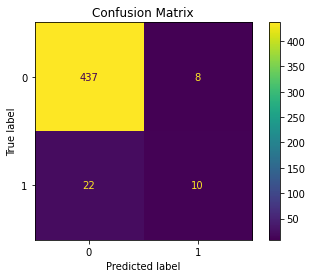

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       445
           1       0.56      0.31      0.40        32

    accuracy                           0.94       477
   macro avg       0.75      0.65      0.68       477
weighted avg       0.93      0.94      0.93       477



In [120]:
# Instantiate model
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_train_acc, knn_acc, knn_cm, knn_cr = predict(knn_model, X_train, X_test, y_train, y_test)

The testing accuracy is just a little higher than the training accuracy. There is a close tendency to overfit. Grid search is used to tackle this overfitting problem.

### Grid Search

Finding the best K value for KNN to improve model performance.

In [121]:
# Define parameters
params = {
    'n_neighbors': [3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid Search
gs = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=params,
    verbose=1
)

gs_results = gs.fit(X_train, y_train)

print("Best Score:", gs_results.best_score_)
print("Best Estimator:", gs_results.best_estimator_)
print("Best Params:", gs_results.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Score: 0.9243243243243244
Best Estimator: KNeighborsClassifier(metric='euclidean', n_neighbors=37)
Best Params: {'metric': 'euclidean', 'n_neighbors': 37, 'weights': 'uniform'}


From the grid search conducted above, the best cross-validated score of the best estimator is shown. The K value is also shown here with the suitable `weights`.

### Fine-tuning

Using the grid search results conducted above, another KNN model is instantiated and trained.

Training Accuracy: 0.9243243243243243
Testing Accuracy: 0.9371069182389937


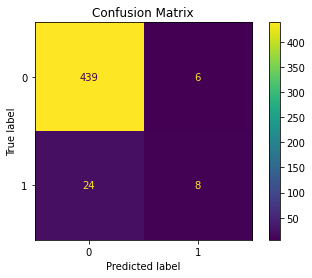

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       445
           1       0.57      0.25      0.35        32

    accuracy                           0.94       477
   macro avg       0.76      0.62      0.66       477
weighted avg       0.92      0.94      0.93       477



In [123]:
# Instantiate model
knn_model = KNeighborsClassifier(n_neighbors=37, metric='euclidean', weights='uniform')

knn_train_acc, knn_acc, knn_cm, knn_cr = predict(knn_model, X_train, X_test, y_train, y_test)

From the results above, the model has a higher testing accuracy than training. It has excellent precision and recall scores, meaning that the model can correctly identify normal products most of the time. The confusion matrix shows that around 400 normal products are correctly classified as normal. The model however performs poorer when it comes to detecting defectives. Around 20 defective products are predicted as normal.

## Decision Tree Classifier

A decision tree basically works by splitting a node when it evaluates on an attribute. Each branch is the outcome of the test and each leaf node represents the class label.

### First Round

Training Accuracy: 0.9522522522522523
Testing Accuracy: 0.939203354297694


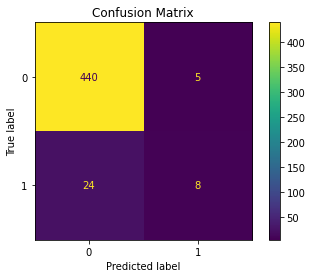

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       445
           1       0.62      0.25      0.36        32

    accuracy                           0.94       477
   macro avg       0.78      0.62      0.66       477
weighted avg       0.93      0.94      0.93       477



In [124]:
# Instantiate the model
tree_model = DecisionTreeClassifier()

tree_train_acc, tree_acc, tree_cm, tree_cr = predict(tree_model, X_train, X_test, y_train, y_test)

The decision tree model tends to overfit as the training accuracy is higher than the testing accuracy. To solve this problem, grid search is used to find out the best parameters for the tree model.

### Grid Search

The `max_depth` of the tree needs to be limited for a better performance.

In [136]:
# Define parameters
params = {'max_depth': [x for x in range(3, 11)], 'min_samples_leaf': [x for x in range(1, 80, 3)]}

# Grid Search
gs = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=params,
    verbose=1
)

gs_results = gs.fit(X_train, y_train)

print("Best Score:", gs_results.best_score_)
print("Best Estimator:", gs_results.best_estimator_)
print("Best Params:", gs_results.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Score: 0.927027027027027
Best Estimator: DecisionTreeClassifier(max_depth=3, min_samples_leaf=25)
Best Params: {'max_depth': 3, 'min_samples_leaf': 25}


From the grid search conducted above, the best cross-validated score of the best estimator is shown. The best `max_depth` and `min_samples_leaf` for the decision tree to avoid overfitting is shown.

### Fine-tuning

Fine-tuning the tree model using the parameter above.

Training Accuracy: 0.927027027027027
Testing Accuracy: 0.9350104821802935


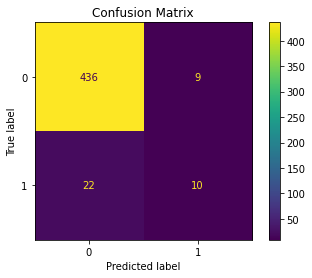

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       445
           1       0.53      0.31      0.39        32

    accuracy                           0.94       477
   macro avg       0.74      0.65      0.68       477
weighted avg       0.92      0.94      0.93       477



In [139]:
tree_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=25)

tree_train_acc, tree_acc, tree_cm, tree_cr = predict(tree_model, X_train, X_test, y_train, y_test)

The issue of overfitting is solved after fine-tuning. From the confusion matrix, it is known that the decision tree model performs very similary to the KNN model. It tends to misclassify defective products into normal products.

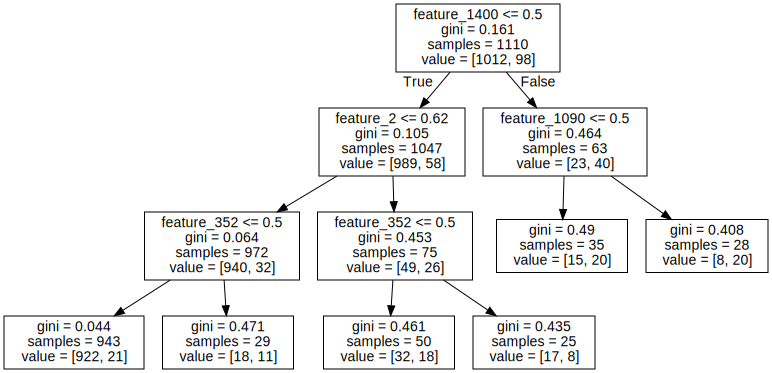

In [140]:
dot_data = export_graphviz(tree_model, feature_names=X_df.columns.tolist())
graph = graphviz.Source(dot_data)
graph

The graph above visualises the decision-making process of the decision tree.

## Support Vector Machines

The model classifies data by using the best hyper plane that separates two data classes, utilising the  margin from the plane to the data point.

### First Round

Training Accuracy: 0.9369369369369369
Testing Accuracy: 0.9308176100628931


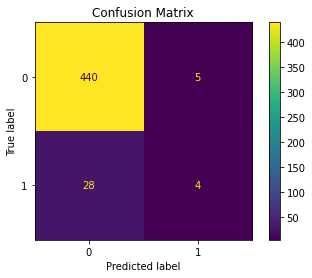

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       445
           1       0.44      0.12      0.20        32

    accuracy                           0.93       477
   macro avg       0.69      0.56      0.58       477
weighted avg       0.91      0.93      0.91       477



In [141]:
# Instantiate model
svm_model = SVC(kernel='rbf', C=1)

# Predict
svm_train_acc, svm_acc, svm_cm, svm_cr = predict(svm_model, X_train, X_test, y_train, y_test)

The model performs well at the first round. However, its performance might be improved if the optimal parameters are found.

### Grid Search

Finding the best kernel, C and gamma values.

In [143]:
# Define parameters
params = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

# Grid Search
gs = GridSearchCV(
    SVC(),
    param_grid=params,
    verbose=1
)

gs_results = gs.fit(X_train, y_train)

print("Best Score:", gs_results.best_score_)
print("Best Estimator:", gs_results.best_estimator_)
print("Best Params:", gs_results.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Score: 0.9234234234234234
Best Estimator: SVC(C=1, gamma=0.1, kernel='poly')
Best Params: {'C': 1, 'gamma': 0.1, 'kernel': 'poly'}


From the grid search conducted above, the best cross-validated score of the best estimator is shown. The C and gamma value are also shown here with the suitable kernel.

### Fine-tuning

Fune-tuning the model using the parameters above.

Training Accuracy: 0.9234234234234234
Testing Accuracy: 0.9371069182389937


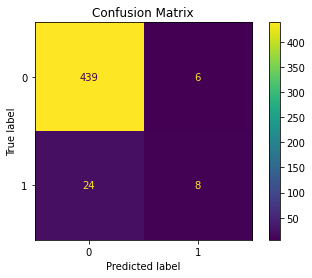

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       445
           1       0.57      0.25      0.35        32

    accuracy                           0.94       477
   macro avg       0.76      0.62      0.66       477
weighted avg       0.92      0.94      0.93       477



In [146]:
# Instantiate model
svm_model = SVC(kernel='poly', C=1, gamma=0.1)

# Predict
svm_train_acc, svm_acc, svm_cm, svm_cr = predict(svm_model, X_train, X_test, y_train, y_test)

After fine-tuning, the training accuracy decreased, which can be a good sign because it might signify that the model is not memorising the data. The performance of the SVM is similar to that of the KNN and decision tree. It also tends to misclassify defective products as normal products.

# Evaluation

Evaluating the models.

In [147]:
# Define parameters
y = {
    'accuracy': [knn_acc, tree_acc, svm_acc],
    'precision': [knn_cr['1']['precision'], tree_cr['1']['precision'], svm_cr['1']['precision']],
    'recall': [knn_cr['1']['recall'], tree_cr['1']['recall'], svm_cr['1']['recall']],
    'models': ['knn', 'tree', 'svm']
}

y = pd.DataFrame(y)
y

,accuracy,precision,recall,models
0,0.937107,0.571429,0.2500,knn
1,0.935010,0.526316,0.3125,tree
2,0.937107,0.571429,0.2500,svm


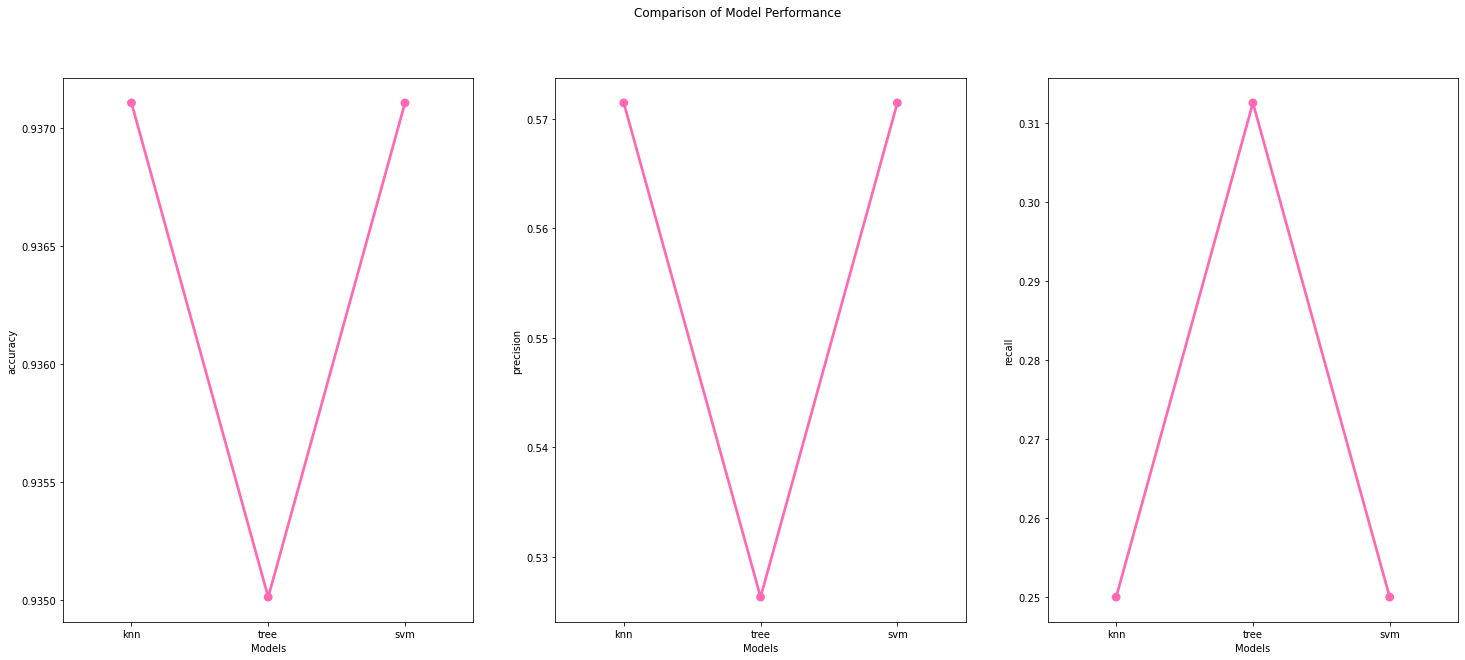

In [148]:
fig, ax = plt.subplots(1, 3, figsize=(25, 10))
ax = ax.flatten()

fig.suptitle('Comparison of Model Performance')

for i, v in enumerate(y):
    if(v == 'models'):
        break
    sns.pointplot(data=y, ax=ax[i], x=y['models'], y=y[v], color='hotpink')
    ax[i].set(xlabel='Models', ylabel=v)

As shown in the graph, the testing accuracy and precision of KNN and SVM is almost the same. However, the decision tree outperforms both models interms of recall. The objective of this project is to identify defective products, so a high accuracy does not mean a lot. A high accuracy at most shows that the models are good at predicting normal products.
<br />
<br />
In this case, the positive refers to a defective product, and the negative refers to a normal product. <br/ >
A true positive is a defective product being classified correctly as a classified product. <br />
A false positive is when a normal product is classified as a defective product. <br />
A true negative is a normal product being classified as a normal product. <br />
A false negative is a defective product being classified as a normal product. <br />
<br />
<br />
Out of the four cases above, It is better that the model misclassify normal products as defective products rather than the other way round, because if defective products are misclassified as normal products and are sold to customers, the company's reputation will be negatively affected. **False positives should be higher than the false negatives.**
<br />
<br />
KNN and SVM both having a high precision means that out of the total actual positives (actual defective products), the models got it correct most of the time (high true positive). Recall is higher for the decision tree means that the model out of all the total positives predicted (total defective products predicted), it has high true positive. Following the logic that false positives should be more than false negatives, due to the formulae of precision and recall, a higher false positive will give **a lower precision**, and a lower false negative will give **a higher recall**.
<br />
<br />
The model that satisfy a lower precision and a higher recall is the decision tree model. Therefore, the ideal model to be selected is the **decision tree classifier**.